In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# dataset: https://www.kaggle.com/datasets/barkhaverma/student-performance

In [108]:
# Importing and understanding of data.
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'final_grade' ]
data = pd.read_csv('/content/student-por.csv', sep=",")
data.columns = data_names
print(len(data.values))
data = data.drop_duplicates()
data.head(10)

649


,school,sex,age,address,family_size,parent_cohabition_status,mother_education,father_education,mother_job,father_job,...,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [71]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

# the final grade seems to be most negatively correlated with number of failures in past classes and also weekday alcohol consumption
# it seems to be most positively correlated with studytime, mother's education (almost as much as studytime!), but mainly grades from previos periods. 

,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11
mother_education,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24
father_education,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,-0.09,0.11,-0.09,0.05,0.09,0.06
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12
going_out,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09
workday_alcohol,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20


In [72]:
# We can see that the final grade is highly correlated with grades in other period.
# Since these are very simular, we remove these columns too not get overly optimistic results on the algorithm. 
data = data.drop(['grade_period1', 'grade_period2'], axis=1)

In [73]:
# Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty.
# This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

# We start with the numerical features: 

numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'final_grade']
# there are 14 numerical attributes.  
X = data[numerical_columns]   # size: 649
y = data['final_grade']       # size: 649

# 80/20 split, random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)
yhat_lasso = lasso_model.predict(X_test)    # the prediction
print(yhat_lasso, '\n')

mse = mean_squared_error(y_test, yhat_lasso)   # the average squared difference between the estimated value and the actual value.

print("Mean squared error on test set: %.3f" % mse)



[ 1.23136827 11.09347875  8.40381226  8.40381226 11.09347875 11.09347875
 14.67970074 12.88658975 15.57625624 13.78314524  9.30036775 10.19692325
  9.30036775 13.78314524 15.57625624 11.99003425 10.19692325  9.30036775
 11.99003425 11.09347875 15.57625624  1.23136827 10.19692325 10.19692325
 11.09347875  9.30036775 12.88658975 11.99003425 13.78314524 11.09347875
 10.19692325 12.88658975 10.19692325  1.23136827 10.19692325 11.09347875
 13.78314524 14.67970074 17.36936724 14.67970074 15.57625624 11.09347875
 13.78314524 12.88658975 11.99003425 16.47281174 13.78314524 17.36936724
 10.19692325 16.47281174 10.19692325 17.36936724 11.09347875 15.57625624
 17.36936724 11.09347875  9.30036775 10.19692325 14.67970074 13.78314524
  9.30036775  8.40381226 16.47281174  9.30036775 17.36936724 11.99003425
 14.67970074 17.36936724 11.09347875 14.67970074 12.88658975 15.57625624
 11.09347875 11.09347875 11.09347875 13.78314524 15.57625624 10.19692325
 11.99003425 10.19692325 11.09347875 12.88658975 13

In [138]:
# We actually want to work with all attributes, not only numerical!

categorical_columns = ['school', 'sex', 'family_size', 'parent_cohabition_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']
# there are 16 categorical attributes


# this we actually DON'T WANT TO USE, so I don't currently use this cell for anything right now.
encoded_data = pd.DataFrame()
for column in categorical_columns:
  LE = LabelEncoder()        
  dt = LE.fit_transform(data[column])    # encoding all categorical values so they get a numerical value instead.
  encoded_data[column] = dt

for column in numerical_columns:
  encoded_data[column] = data[column]

cat_and_num = categorical_columns + numerical_columns    # a new list with a length of 30 as expected.

# Let's scale the data so that all features will be easy to interpret and compare.

# OBS, we will need to do scaling with the data we are actually using later, after doing get_dummies instead!

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)
scaled_dataframe = pd.DataFrame(scaled_data, columns = cat_and_num)  # columns = cat_and_num
print(scaled_dataframe.columns)
scaled_dataframe.head()


Index(['school', 'sex', 'family_size', 'parent_cohabition_status',
       'mother_job', 'father_job', 'reason', 'guardian', 'school_support',
       'family_support', 'paid', 'extra_curricular_activities', 'nursery',
       'higher', 'internet_access', 'romantic', 'age', 'mother_education',
       'father_education', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'final_grade'],
      dtype='object')


,school,sex,family_size,parent_cohabition_status,mother_job,father_job,reason,guardian,school_support,family_support,...,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,final_grade
0,-0.730944,-0.833377,-0.648175,-2.666927,-1.556453,2.057248,-0.933974,0.332648,2.923032,-1.259229,...,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-0.280658
1,-0.730944,-0.833377,-0.648175,0.374963,-1.556453,-0.260728,-0.933974,-1.594926,-0.342110,0.794137,...,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.280658
2,-0.730944,-0.833377,1.542792,0.374963,-1.556453,-0.260728,0.745109,0.332648,2.923032,-1.259229,...,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.029116
3,-0.730944,-0.833377,-0.648175,0.374963,-0.754756,0.898260,-0.094432,0.332648,-0.342110,0.794137,...,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.648663
4,-0.730944,-0.833377,-0.648175,0.374963,0.046941,-0.260728,-0.094432,-1.594926,-0.342110,0.794137,...,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,0.338889


In [139]:
corr = encoded_data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,school,sex,family_size,parent_cohabition_status,mother_job,father_job,reason,guardian,school_support,family_support,paid,extra_curricular_activities,nursery,higher,internet_access,romantic,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,final_grade
school,1.00,-0.08,0.02,0.03,-0.21,-0.08,-0.11,-0.06,-0.12,-0.06,-0.01,-0.09,0.00,-0.14,-0.24,0.07,0.09,-0.25,-0.21,0.25,-0.14,0.11,-0.03,0.03,0.04,0.05,0.01,-0.06,-0.16,-0.28
sex,-0.08,1.00,0.10,0.06,0.15,0.08,0.01,-0.04,-0.11,-0.13,0.08,0.12,-0.04,-0.06,0.07,-0.11,-0.04,0.12,0.08,0.04,-0.21,0.07,0.08,0.15,0.06,0.28,0.32,0.14,0.02,-0.13
family_size,0.02,0.10,1.00,-0.24,0.02,-0.06,0.03,0.00,-0.06,-0.04,-0.05,-0.01,0.10,0.00,0.01,-0.03,-0.00,-0.01,-0.04,0.01,-0.01,-0.07,0.00,-0.02,-0.00,0.06,0.08,0.00,0.00,0.05
parent_cohabition_status,0.03,0.06,-0.24,1.00,-0.03,0.05,-0.03,-0.17,-0.01,0.01,0.02,0.10,-0.03,0.02,0.06,-0.05,-0.01,-0.06,-0.03,0.04,-0.01,-0.01,0.05,0.04,0.03,0.04,0.07,0.01,-0.12,-0.00
mother_job,-0.21,0.15,0.02,-0.03,1.00,0.20,0.06,0.01,0.01,0.04,0.01,0.10,0.04,0.15,0.26,-0.07,-0.07,0.46,0.29,-0.16,0.06,-0.12,0.03,0.05,0.00,0.05,0.03,0.08,0.03,0.15
father_job,-0.08,0.08,-0.06,0.05,0.20,1.00,0.04,-0.08,-0.01,-0.04,-0.02,0.02,-0.05,0.09,0.09,-0.00,-0.05,0.15,0.21,0.00,-0.02,-0.06,0.04,-0.04,-0.03,0.06,0.04,-0.03,-0.05,0.05
reason,-0.11,0.01,0.03,-0.03,0.06,0.04,1.00,-0.07,0.05,0.01,-0.05,0.08,0.04,0.09,0.11,-0.05,-0.03,0.13,0.08,-0.09,0.14,-0.14,0.04,-0.05,-0.01,-0.01,0.01,-0.12,0.02,0.12
guardian,-0.06,-0.04,0.00,-0.17,0.01,-0.08,-0.07,1.00,-0.04,0.02,0.07,0.01,-0.02,-0.11,-0.00,0.11,0.27,-0.01,-0.10,0.03,-0.01,0.17,-0.05,0.05,0.05,0.02,-0.01,0.02,0.15,-0.08
school_support,-0.12,-0.11,-0.06,-0.01,0.01,-0.01,0.05,-0.04,1.00,0.08,0.04,-0.03,0.02,0.09,-0.03,-0.09,-0.17,-0.02,0.02,-0.04,0.09,-0.00,-0.01,-0.02,-0.06,-0.03,-0.10,0.02,-0.06,-0.07
family_support,-0.06,-0.13,-0.04,0.01,0.04,-0.04,0.01,0.02,0.08,1.00,0.09,-0.01,0.03,0.09,0.07,-0.02,-0.10,0.12,0.14,-0.04,0.14,-0.01,0.02,0.00,0.02,-0.02,-0.07,0.02,0.04,0.06


In [142]:
X_encoded = pd.get_dummies(data.drop("final_grade", axis=1)) 
y_encoded = data["final_grade"]
# X_encoded = encoded_data.drop("final_grade", axis=1)       # all attributes
# y_encoded = encoded_data["final_grade"]

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=1) 

# We will also divide into a validation set to choose models based on
X_train_encoded, X_val, y_train_encoded, y_val = train_test_split(X_train_encoded, y_train_encoded, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 

lasso_model_total = Lasso(alpha = 0.1)   # A LASSO model with all the features

lasso_model_total.fit(X_train_encoded, y_train_encoded)
yhat_tot_lasso = lasso_model_total.predict(X_val)    # the prediction
print(yhat_tot_lasso)

[10.45062001 11.44718577 12.58689763 14.52383767 10.432389   13.45991154
 14.46060123 13.4667219  11.24769758  9.31442936 18.25509755 11.25682136
 11.21402567  6.27669128 12.49089239 12.2252847  13.12145464 11.23638062
 12.39790279  5.50311067  9.54248326  6.42584666 11.16515495 11.34798708
 10.22252383 14.40079139  9.4780007  16.27393767 10.39731644 12.56211806
  8.59117839  8.29352444  6.40093936  9.33491551 11.30786273 11.33443414
 12.24929839  8.58603702 12.23878251 10.19471058  8.24182724 13.31889771
  9.49441363  8.35346627 13.55675898  9.36174337  7.28143063 11.2334339
 10.34617454  8.55490238 15.92338623 12.44200026 12.22396151 10.42557864
 14.26526156 13.47766102 11.36999623  8.30495198 14.23872439  9.39913198
 11.44752132 11.24987844 12.24955386 13.33457004  5.36197081 12.43369894
 11.32911475  8.34665591  9.55789529 11.34469456 14.26526156 13.15952196
 14.41036728 12.22570794  7.27913858 12.35783259  6.41808611 12.48765499
  9.98238076  7.45674535 10.19295931 16.32269723 14.

In [143]:
# Let's evaluate how well the model did

mse_tot = mean_squared_error(y_val, yhat_tot_lasso)   

print("Mean squared error on test set: %.10f" % mse_tot)

rmse_tot = mean_squared_error(y_val, yhat_tot_lasso, squared = False)  

print("Root mean squared error on test set: %.10f" % rmse_tot)  # RMSE measures the average difference between values predicted by a model and the actual values.
# The lower the RMSE, the better a given model is able to “fit” a dataset.

r2_tot_score = r2_score(y_val, yhat_tot_lasso)   # Coefficient of determination. Best possible r2 score is 1.0
print("R^2 score on the test set_ %.10f" % r2_tot_score)

cross_val = cross_val_score(lasso_model_total, X_val, y_val, cv=10,scoring=None, error_score = "raise").mean()
print("Cross-validation accuracy score:", cross_val) 
# The resulting cross-validation score is the average accuracy of the model across all 10 folds.

# As we can see, we got a pretty alright result on the validation set.
# We can probably obtain an even better result by selecting the most important features in the data.

Mean squared error on test set: 1.8964386684
Root mean squared error on test set: 1.3771124385
R^2 score on the test set_ 0.8193114430
Cross-validation accuracy score: 0.8245410139830991


58


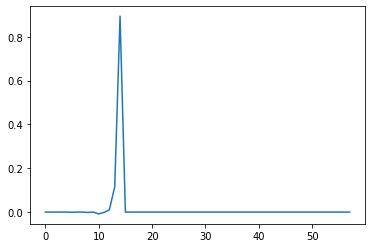

Chosen features:

father_job
school_support
paid
extra_curricular_activities
nursery
higher
internet_access

These features were removed:

school
sex
family_size
parent_cohabition_status
mother_job
reason
guardian
family_support
romantic
age
mother_education
father_education
traveltime
studytime
failures
famrel
freetime
going_out
workday_alcohol
weekend_alcohol
health
absences


In [144]:
# these features makes no sense

coefficients = lasso_model_total.coef_
print(len(coefficients))
plt.plot(range(len(coefficients)), coefficients)
plt.show()
chosen_features = []

print('Chosen features:' + '\n')
for i in range(29):
    if coefficients[i] != 0:
        print(cat_and_num[i])
        chosen_features.append(cat_and_num[i])

print('\n' + 'These features were removed:' + '\n')
for i in range(29):
  if coefficients[i] == 0:
        print(cat_and_num[i])

In [145]:
# not working right now, we should use get_dummies for this as well

"""# X_sel = encoded_data[chosen_features]
X_features = pd.DataFrame(data[chosen_features])
X_sel = pd.get_dummies(X_features)
y_sel = chosen_features

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_encoded, test_size=0.2, random_state=1) 

X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(X_train_sel, y_train_sel, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

lasso_model_selected = Lasso(alpha = 0.1)   # A LASSO model with all the features

lasso_model_selected.fit(X_train_sel, y_train_sel)
yhat_from_selection = lasso_model_selected.predict(X_val_sel)    # the prediction
print(yhat_from_selection)"""

[12.65990855 12.41093967 12.47676181 12.62113675 12.62113675 12.41093967
 12.37216786 12.41093967 12.65990855  9.77848408 12.43799    12.47676181
 12.03034055 10.02745296 12.62113675 12.41093967 11.82014347 12.47676181
 12.37216786 12.62113675 12.62113675 12.41093967 12.18902112 12.47676181
  9.81725589 12.37216786 10.02745296 12.65990855 10.02745296 12.65990855
 12.65990855 12.41093967 12.62113675 12.62113675 12.37216786  9.43665676
 12.03034055 12.37216786 12.65990855 12.65990855 10.02745296 12.62113675
 12.37216786 12.62113675 12.62113675 12.03034055 12.03034055 12.62113675
 12.62113675 12.62113675 12.65990855 12.65990855 12.65990855 11.78137167
 12.41093967 12.37216786 11.8471938  12.37216786 12.03034055 12.22779293
 12.65990855 12.62113675 12.65990855 12.41093967 12.06911235 12.18902112
 12.65990855 12.65990855 12.65990855 12.22779293 12.62113675 12.41093967
 12.62113675 12.65990855 12.65990855 12.47676181 12.43799    12.37216786
 12.62113675  9.43665676 12.41093967 12.62113675 12

In [123]:
# Let's evaluate how well the model did again

mse_tot = mean_squared_error(y_val_sel, yhat_from_selection)   

print("Mean squared error on test set: %.10f" % mse_tot)

rmse_tot = mean_squared_error(y_val_sel, yhat_from_selection, squared = False)  

print("Root mean squared error on test set: %.10f" % rmse_tot)  # RMSE measures the average difference between values predicted by a model and the actual values.
# The lower the RMSE, the better a given model is able to “fit” a dataset.

r2_tot_score = r2_score(y_val_sel, yhat_from_selection)   # Coefficient of determination. Best possible r2 score is 1.0
print("R^2 score on the test set_ %.10f" % r2_tot_score)

cross_val = cross_val_score(lasso_model_selected, X_val_sel, y_val_sel, cv=10,scoring=None, error_score = "raise").mean()
print("Cross-validation accuracy score:", cross_val) 
# The resulting cross-validation score is the average accuracy of the model across all 10 folds.

Mean squared error on test set: 9.9192689059
Root mean squared error on test set: 3.1494870862
R^2 score on the test set_ 0.0549136044
Cross-validation accuracy score: -0.013123113938149699
